In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from ucimlrepo import fetch_ucirepo 
import util
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Load in the Adult dataset

adult = fetch_ucirepo(id=2)

X = adult.data.features 
y = adult.data.targets

adult_original = pd.concat([X, y], axis=1)
adult = adult_original.copy()

In [15]:
adult['income'] = adult['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [16]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


<Figure size 800x500 with 0 Axes>

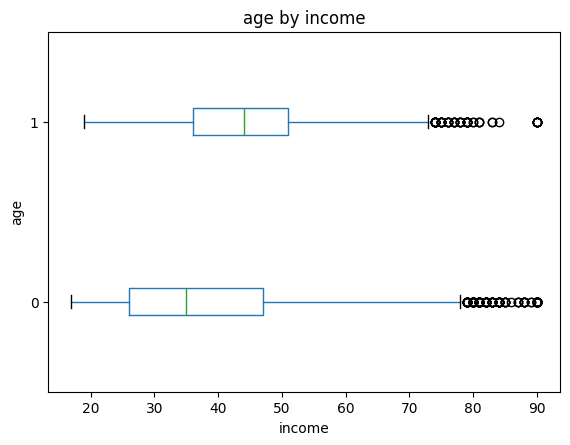

<Figure size 800x500 with 0 Axes>

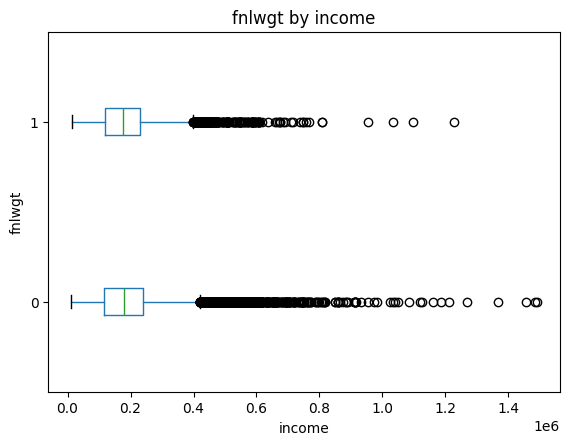

<Figure size 800x500 with 0 Axes>

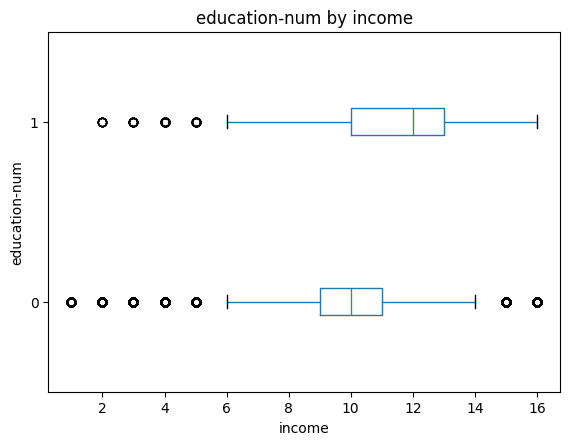

<Figure size 800x500 with 0 Axes>

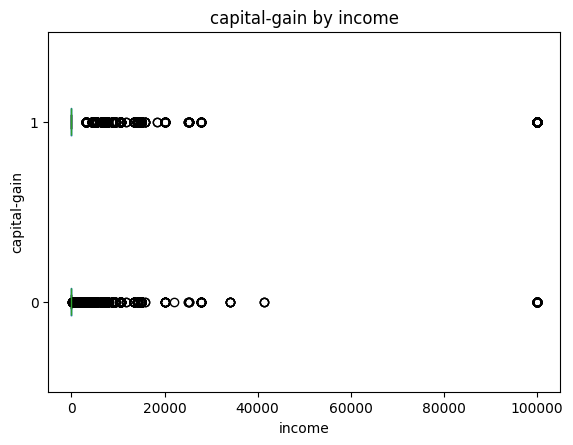

<Figure size 800x500 with 0 Axes>

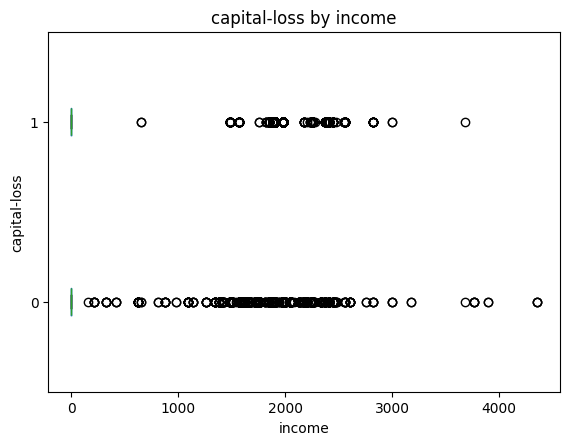

<Figure size 800x500 with 0 Axes>

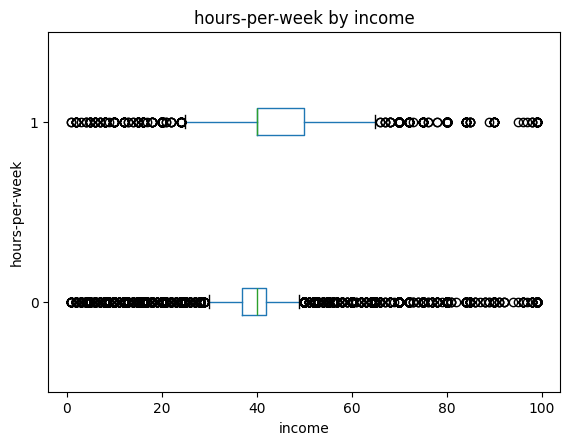

In [17]:
def boxplot(data, feature, by):
    plt.figure(figsize=(8, 5))
    data.boxplot(column=feature, by=by, vert=False, grid=False)
    plt.title(f'{feature} by {by}')
    plt.suptitle('')
    plt.xlabel(by)
    plt.ylabel(feature)
    plt.show()

adult['has-capital-gain'] = np.where(adult['capital-gain'] > 0, 1, 0)
adult['has-capital-loss'] = np.where(adult['capital-loss'] > 0, 1, 0)

boxplot(adult, 'age', 'income')
boxplot(adult, 'fnlwgt', 'income')
boxplot(adult, 'education-num', 'income')
boxplot(adult, 'capital-gain', 'income')
boxplot(adult, 'capital-loss', 'income')
boxplot(adult, 'hours-per-week', 'income')

In [18]:
print(adult['native-country'].unique())

continent_map = {
    'United-States': 'North America',
    'Cuba': 'North America',
    'Jamaica': 'North America',
    'India': 'Asia',
    '?': 'Other/Unknown',
    'Mexico': 'North America',
    'South': 'South America',
    'Puerto-Rico': 'North America',
    'Honduras': 'North America',
    'England': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Iran': 'Asia',
    'Philippines': 'Asia',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Columbia': 'South America',
    'Cambodia': 'Asia',
    'Thailand': 'Asia',
    'Ecuador': 'South America',
    'Laos': 'Asia',
    'Taiwan': 'Asia',
    'Haiti': 'North America',
    'Portugal': 'Europe',
    'Dominican-Republic': 'North America',
    'El-Salvador': 'North America',
    'France': 'Europe',
    'Guatemala': 'North America',
    'China': 'Asia',
    'Japan': 'Asia',
    'Yugoslavia': 'Europe',
    'Peru': 'South America',
    'Outlying-US(Guam-USVI-etc)': 'North America',
    'Scotland': 'Europe',
    'Trinadad&Tobago': 'North America',
    'Greece': 'Europe',
    'Nicaragua': 'North America',
    'Vietnam': 'Asia',
    'Hong': 'Asia',   # "Hong" = Hong Kong
    'Ireland': 'Europe',
    'Hungary': 'Europe',
    'Holand-Netherlands': 'Europe',
    np.nan: 'Other/Unknown'
}

adult['continent'] = adult['native-country'].map(continent_map).fillna('Other/Unknown')

['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands' nan]


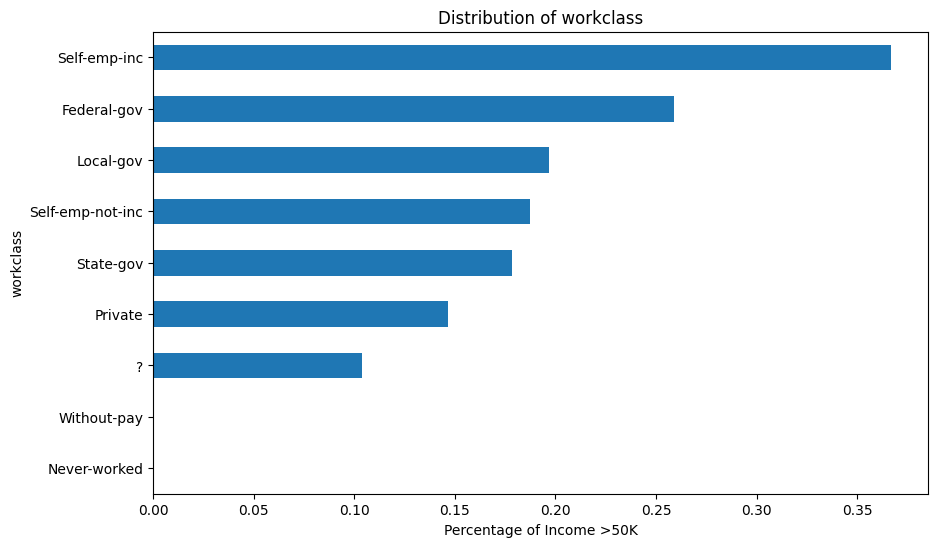

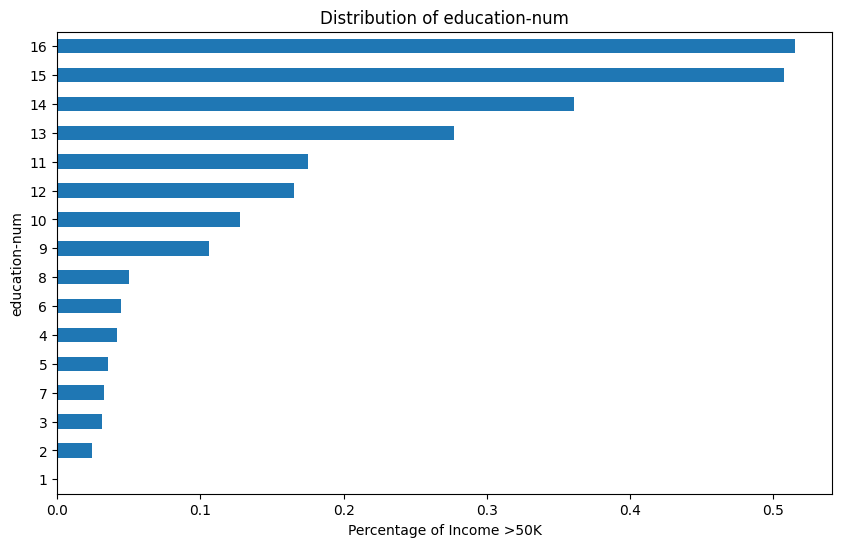

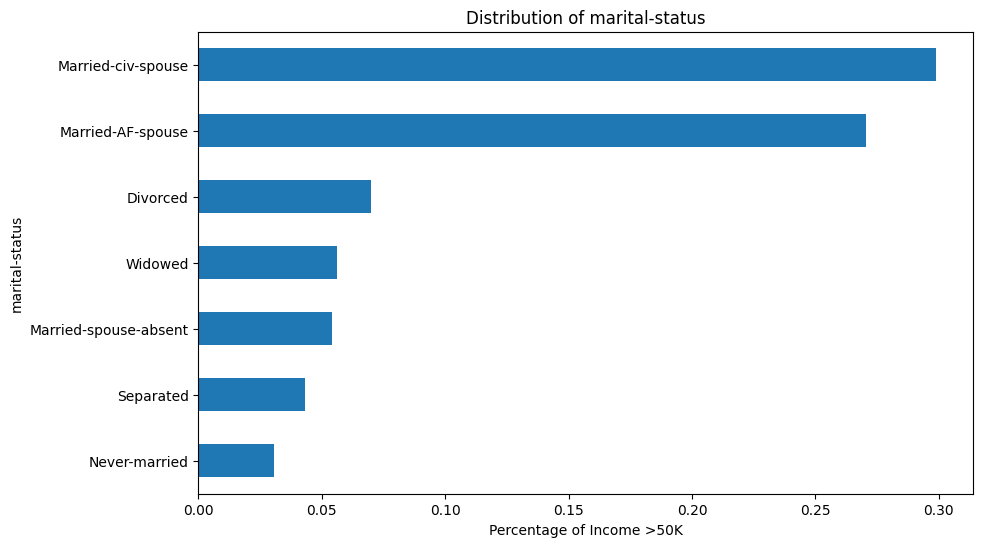

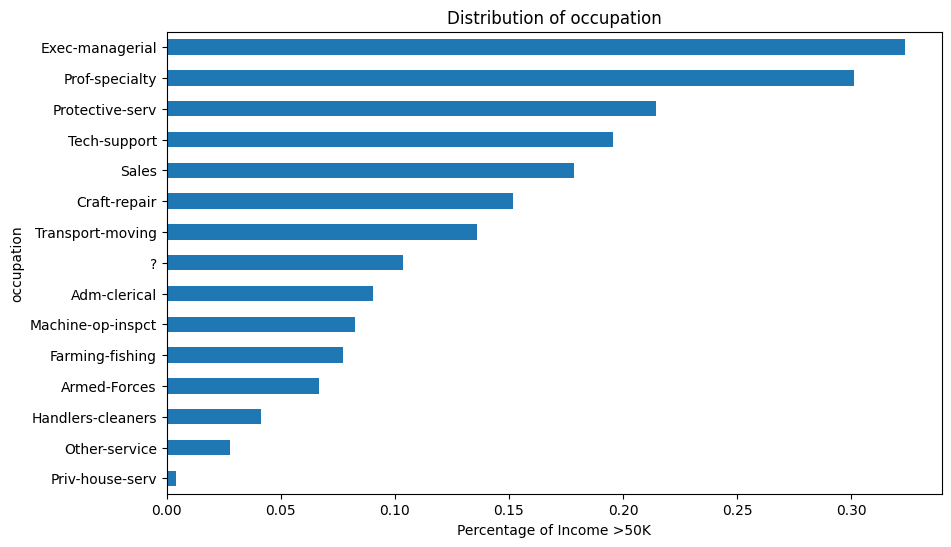

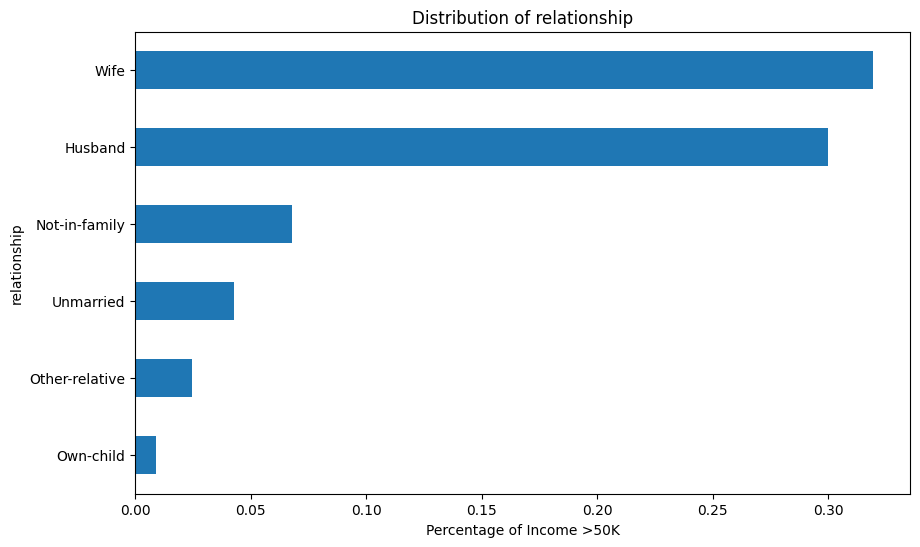

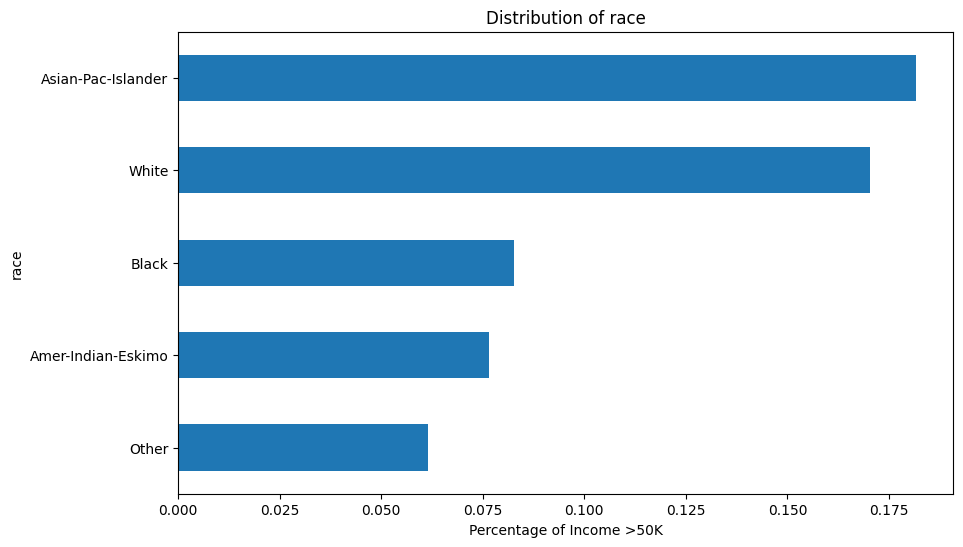

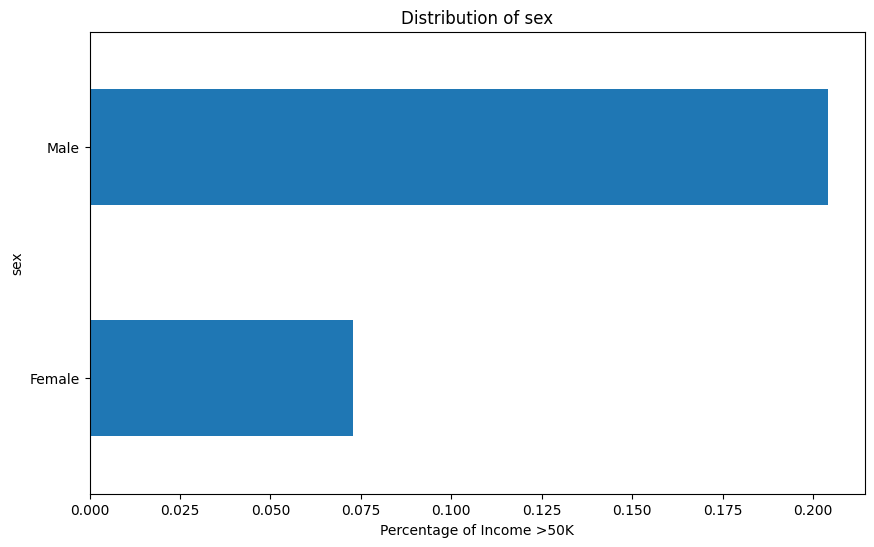

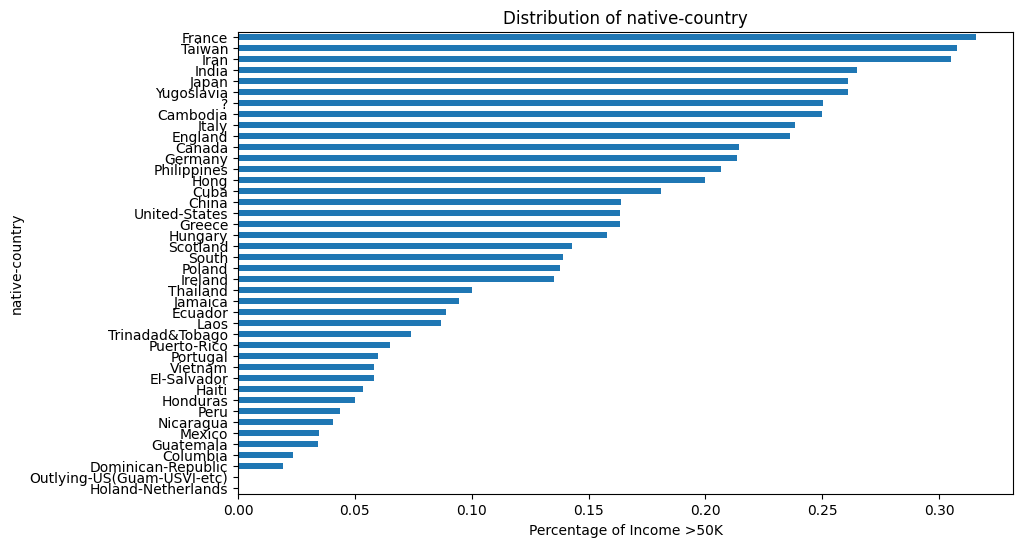

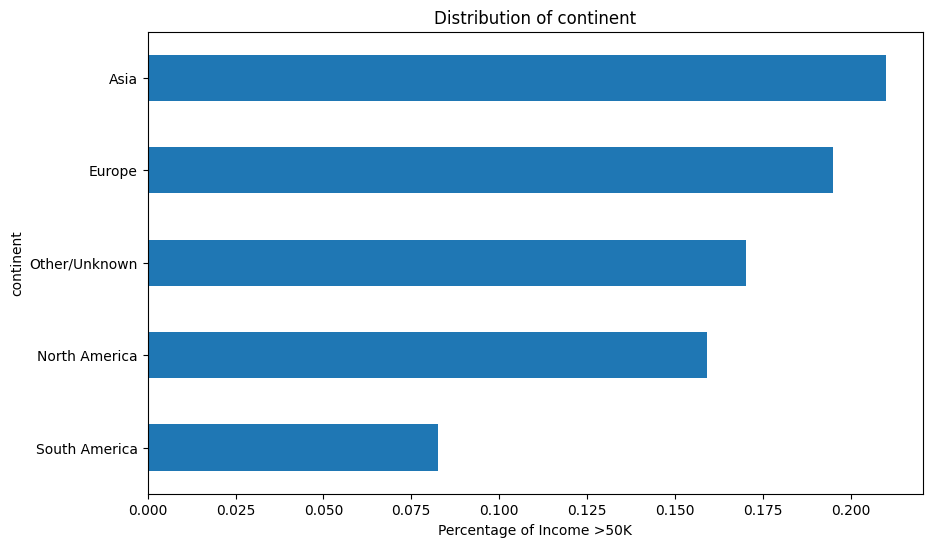

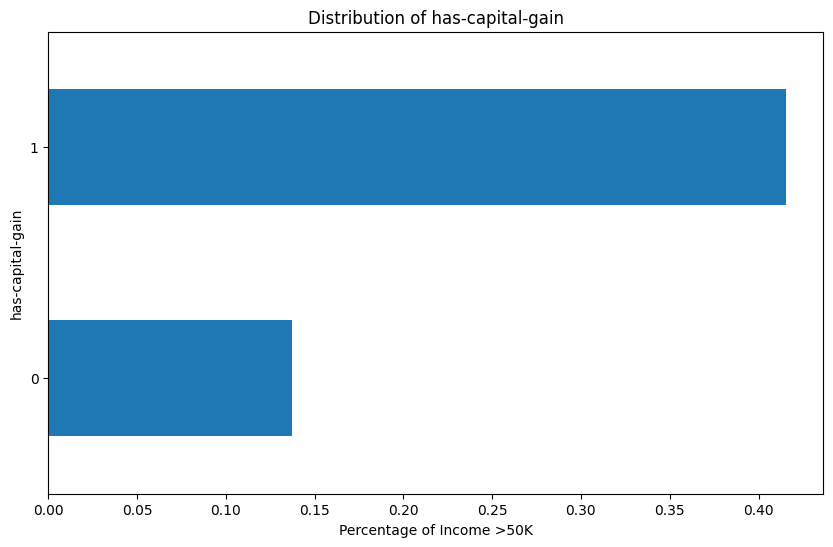

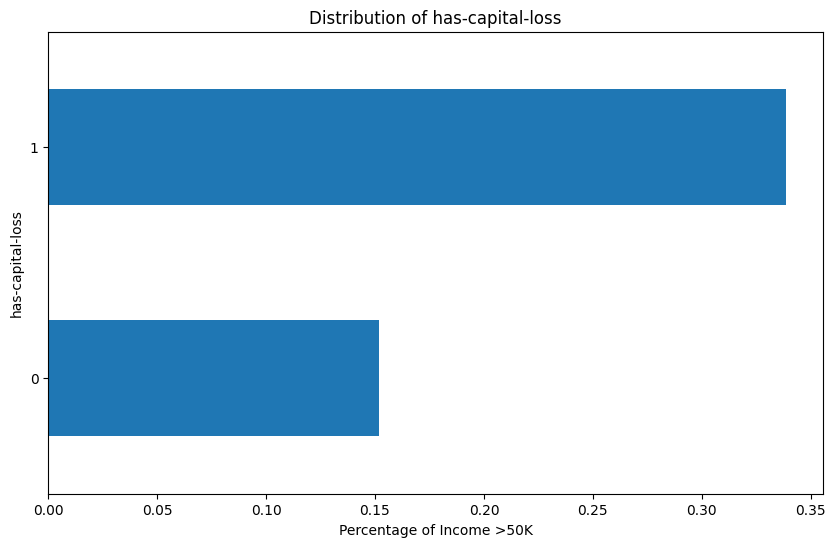

In [25]:
def barh(data, feature, by):
    plt.figure(figsize=(10, 6))
    data.groupby(feature)[by].mean().sort_values(ascending=True).plot(kind='barh')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Percentage of Income >50K')
    plt.ylabel(feature)
    plt.show()

barh(adult, 'workclass', 'income')
barh(adult, 'education-num', 'income')
barh(adult, 'marital-status', 'income')
barh(adult, 'occupation', 'income')
barh(adult, 'relationship', 'income')
barh(adult, 'race', 'income')
barh(adult, 'sex', 'income')
barh(adult, 'native-country', 'income')
barh(adult, 'continent', 'income')
barh(adult, 'has-capital-gain', 'income')
barh(adult, 'has-capital-loss', 'income')

In [26]:
from sklearn.preprocessing import StandardScaler

continent_map = {
    'United-States': 'North America',
    'Cuba': 'North America',
    'Jamaica': 'North America',
    'India': 'Asia',
    '?': 'Other/Unknown',
    'Mexico': 'North America',
    'South': 'South America',
    'Puerto-Rico': 'North America',
    'Honduras': 'North America',
    'England': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Iran': 'Asia',
    'Philippines': 'Asia',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Columbia': 'South America',
    'Cambodia': 'Asia',
    'Thailand': 'Asia',
    'Ecuador': 'South America',
    'Laos': 'Asia',
    'Taiwan': 'Asia',
    'Haiti': 'North America',
    'Portugal': 'Europe',
    'Dominican-Republic': 'North America',
    'El-Salvador': 'North America',
    'France': 'Europe',
    'Guatemala': 'North America',
    'China': 'Asia',
    'Japan': 'Asia',
    'Yugoslavia': 'Europe',
    'Peru': 'South America',
    'Outlying-US(Guam-USVI-etc)': 'North America',
    'Scotland': 'Europe',
    'Trinadad&Tobago': 'North America',
    'Greece': 'Europe',
    'Nicaragua': 'North America',
    'Vietnam': 'Asia',
    'Hong': 'Asia',   # "Hong" = Hong Kong
    'Ireland': 'Europe',
    'Hungary': 'Europe',
    'Holand-Netherlands': 'Europe',
    np.nan: 'Other/Unknown'
}

def preprocess_adult_data(data_original):
    data = data_original.copy()
    data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)
    # Drop feature fnlwgt
    data.drop(columns=['fnlwgt'], inplace=True)
    # Drop feature education
    data.drop(columns=['education'], inplace=True)
    # Feature education-num: Combine level 15 and 16 into single category
    data['education-num'] = data['education-num'].apply(lambda x: 15 if x >= 15 else x)
    # Feature marital-status: Combine Married-civ-spouse, Married-AF-spouse into single category and the rest into another category
    data['marital-status'] = data['marital-status'].apply(lambda x: 1 if x in ['Married-civ-spouse', 'Married-AF-spouse'] else 0)
    # Drop relationship feature since it is described by marital-status
    data.drop(columns=['relationship'], inplace=False)
    # Create continent feature from native-country
    data['continent'] = data['native-country'].map(continent_map).fillna('Other/Unknown')
    # Create is-south-american feature
    data['is-south-american'] = data['continent'].apply(lambda x: 1 if x == 'South America' else 0)
    # Drop feature continent
    data.drop(columns=['continent'], inplace=True)
    # Drop feature native-country
    data.drop(columns=['native-country'], inplace=True)
    # Drop capital-gain and capital-loss features, create binary features has-capital-gain and has-capital-loss
    data['has-capital-gain'] = data['capital-gain'].apply(lambda x: 1 if x > 0 else 0)
    data['has-capital-loss'] = data['capital-loss'].apply(lambda x: 1 if x > 0 else 0)
    data.drop(columns=['capital-gain'], inplace=True)
    data.drop(columns=['capital-loss'], inplace=True)
    # Perform scaling
    print(data.dtypes)
    numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    scaler = StandardScaler()
    data[numeric_features] = scaler.fit_transform(data[numeric_features])

    return data, scaler

adult_preprocessed, scaler = preprocess_adult_data(adult_original)

age                   int64
workclass            object
education-num         int64
marital-status        int64
occupation           object
relationship         object
race                 object
sex                  object
hours-per-week        int64
income                int64
is-south-american     int64
has-capital-gain      int64
has-capital-loss      int64
dtype: object


<Figure size 800x500 with 0 Axes>

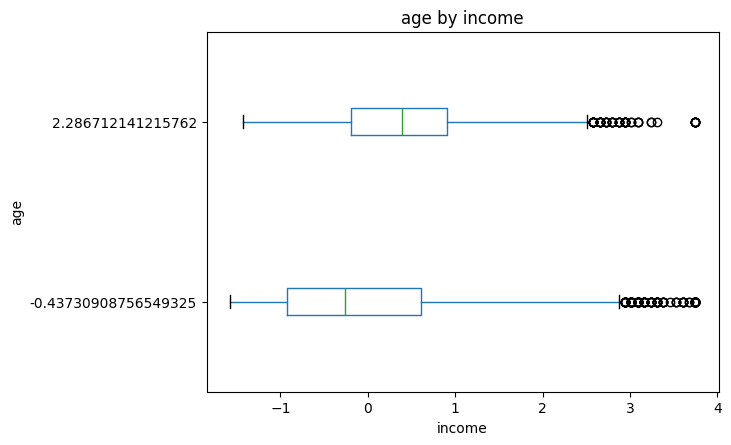

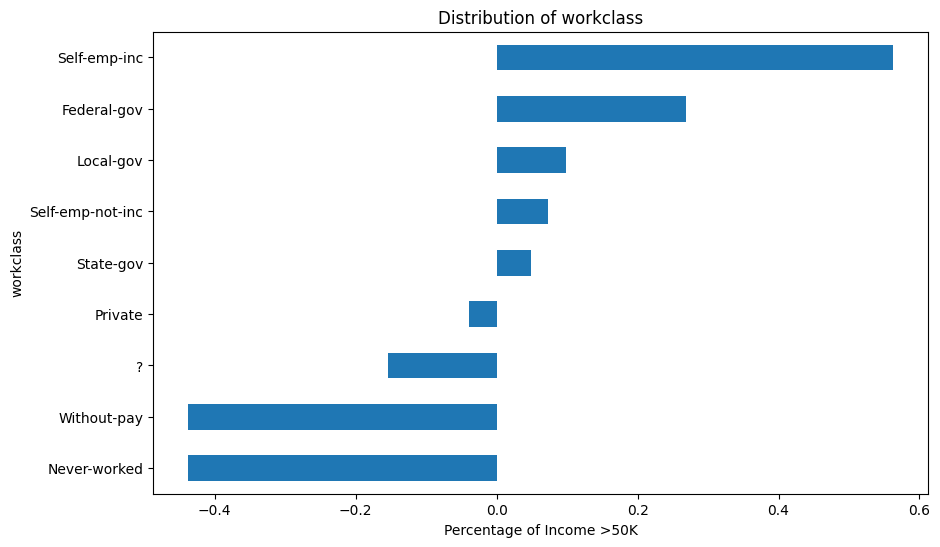

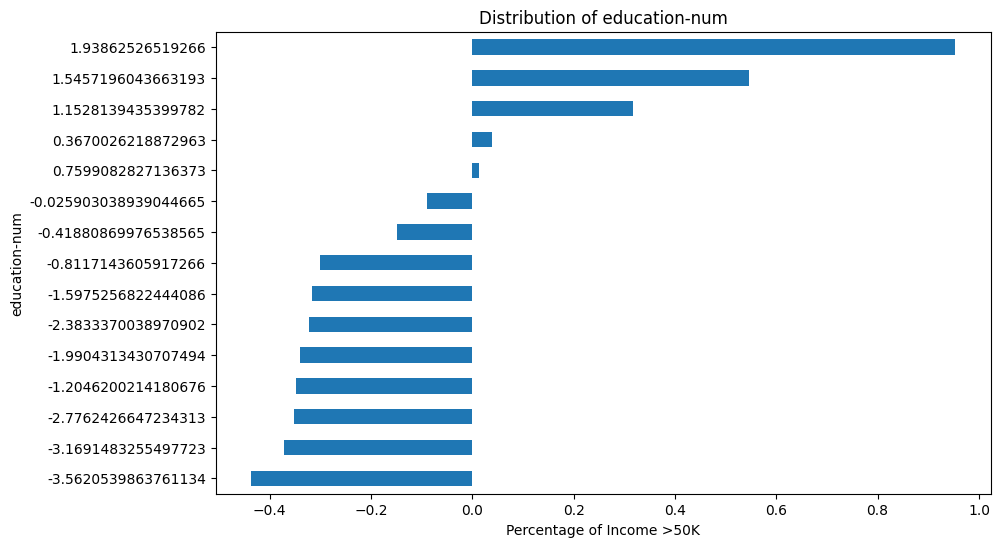

In [ ]:
boxplot(adult_preprocessed, 'age', 'income')
barh(adult_preprocessed, 'workclass', 'income')
barh(adult_preprocessed, 'education-num', 'income')
barh(adult_preprocessed, 'marital-status', 'income')